<h1> 2. Exploratory Data Analysis</h1>

<p><b>2.0</b> Reading the data from the csv file and importing some necessary packages. </p>

In [1]:
import pandas as pd
import os
india_data = pd.read_csv("reddit-india-data.csv")

<p><b>2.1</b> Understanding the dataset overall in terms of the size and data columns while veryfying if there are any null values. <br>
If null values exist that are relevant to the classification, then there would be a need for a function to remove these or add values depending on the dataset as null values adversely affect the performance and accuracy of any machine learning algorithm. 
<br><br>
We also store a list of all the unique flair values into flairs. [Note: While collecting the data, even on multiple attempts are trying different methods, the flair 'Science/Technology' interrupted the code every time. I had to go with excluding that particular flair out of my dataset.]</p>

In [2]:
print("\nInfo: \n")
india_data.info()


Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flair         2000 non-null   object
 1   title         2000 non-null   object
 2   url           2000 non-null   object
 3   body          1098 non-null   object
 4   num_comments  2000 non-null   int64 
 5   comments      1804 non-null   object
 6   score         2000 non-null   int64 
 7   id            2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB


In [3]:
print("\nFlairs present in the dataset: \n")
flairs = india_data.flair.unique()
print(flairs)


Flairs present in the dataset: 

['Non-Political' 'Scheduled' 'Photography' 'Politics' 'Business/Finance'
 'Policy/Economy' 'Sports' 'Food' 'AskIndia' 'Coronavirus']


<p><b>2.2</b> Printing first ten and last ten values to acquire an understanding of what values the data columns actually represent. </p>

In [4]:
india_data.head(10)

,flair,title,url,body,num_comments,comments,score,id
0,Non-Political,Indian States / UTs if renamed for countries w...,https://i.redd.it/hk9o11b8dun41.png,NaN,20,nice name for Uttar Pradesh. Ajay Bisht is go...,185,flwd7r
1,Non-Political,Hotstar finally uploads Sunday’s “Last Week To...,https://www.hotstar.com/in/tv/last-week-tonigh...,NaN,12,First turning off the internet of an entire s...,162,fgb1k3
2,Non-Political,Best non-political stand up comedian?,https://www.reddit.com/r/india/comments/g3zbrt...,Any thing related to politics gives me anxiety...,9,Abhishek Upmanyu\n\n\nKenny Sebastian\n\n\nBi...,2,g3zbrt
3,Non-Political,ICSE and ISC exams have been postponed due to ...,https://cisce.org//UploadedFiles/PDF/COVID%201...,NaN,0,NaN,7,fl4viz
4,Non-Political,"[Non-Political]Friend wrote his first book, th...",https://www.reddit.com/r/india/comments/ezqw6i...,"A friend of mine wrote his first book ""Music M...",0,NaN,13,ezqw6i
5,Non-Political,[Non-Political] Wild Karnataka - David Attenbo...,https://youtu.be/gHSVLd4Ao60,NaN,1,Is this real? Did David Attenborough voice a ...,23,ejetgt
6,Non-Political,[Non-Political] Today the Zoroastrian communit...,https://imgur.com/XY4daDc,NaN,17,Happy Navroz to all dikras and dikris Wow and...,367,crifi9
7,Non-Political,[Non-Political] This newspaper is 50 year old ...,https://imgur.com/lfOyub8,NaN,13,"""Bankon ka rashtiyakaran janata ke hit mein"" ...",116,cfeur8
8,Non-Political,"Prime Time With Ravish Kumar, April 24, 2019 |...",https://www.youtube.com/watch?v=vCmZlob-PIo,NaN,73,"""Modi ji... kuch fakeeri si hai aapme"" *Arnab...",439,bh4wzu
9,Non-Political,"[Non-Political] Dear Bangalore, I see your gra...",http://i.imgur.com/CZoN8aX.jpg,NaN,12,Nobody :\n\nRandom graffiti artist : I'm a ph...,106,bx5zig


In [5]:
india_data.tail(10)

,flair,title,url,body,num_comments,comments,score,id
1990,Coronavirus,Know any Corona Asana? Govt will fund you,https://www.reddit.com/r/india/comments/g1cn1w...,https://www.telegraphindia.com/india/know-any-...,6,Stop breathing aasana We can try some stupid ...,33,g1cn1w
1991,Coronavirus,"Aggressive testing, contact tracing, cooked me...",https://www.washingtonpost.com/world/aggressiv...,NaN,8,Most developed state of India,77,fz0gfa
1992,Coronavirus,"Modi had trapped himself in a corner, then cor...",https://theprint.in/opinion/modi-had-trapped-h...,NaN,35,This is absolutely crazy. I'm no fan of this ...,193,fyvv58
1993,Coronavirus,Coronavirus crisis: Akshay Kumar donates Rs 3 ...,https://www.indiatoday.in/movies/celebrities/s...,NaN,51,Most generous foreigner. Thank you Rajiv. To ...,325,fyv1jv
1994,Coronavirus,Covid-19: How can we help?,https://www.reddit.com/r/india/comments/g19u70...,A lot of us are not in a position to physicall...,3,Harsh Mander's Karwaan e Mohabbat is doing ve...,22,g19u70
1995,Coronavirus,Coronavirus update: Maharashtra lockdown till ...,https://www.hindustantimes.com/india-news/maha...,NaN,0,NaN,28,fz4ibx
1996,Coronavirus,India's lockdown had near 0 effect on the spre...,https://www.reddit.com/r/india/comments/fzs4jb...,See the total cases on log scale here:\nhttps:...,12,I don't think anyone would have supported a n...,0,fzs4jb
1997,Coronavirus,"17 Ludhiana cops, Judge quarantined as arreste...",https://www.news18.com/news/india/17-ludhiana-...,NaN,3,Nope still not community transmission,47,fz2it1
1998,Coronavirus,"Coronavirus Outbreak: A database of books, per...",https://www.firstpost.com/long-reads/coronavir...,NaN,0,NaN,3,fzo3k4
1999,Coronavirus,Covid-19: Kamal Nath says lockdown was delayed...,https://scroll.in/latest/958962/covid-19-kamal...,NaN,38,*I has biggest IQ in the whole MP* - Probably...,439,g0bfmo


<p> Observation from 2.1, 2.2 and 2.3: The body column has a great number of null values. 


Dropping the unnecessary columns: </p>

In [6]:
india_data.drop(['id','score'],axis=1)

,flair,title,url,body,num_comments,comments
0,Non-Political,Indian States / UTs if renamed for countries w...,https://i.redd.it/hk9o11b8dun41.png,NaN,20,nice name for Uttar Pradesh. Ajay Bisht is go...
1,Non-Political,Hotstar finally uploads Sunday’s “Last Week To...,https://www.hotstar.com/in/tv/last-week-tonigh...,NaN,12,First turning off the internet of an entire s...
2,Non-Political,Best non-political stand up comedian?,https://www.reddit.com/r/india/comments/g3zbrt...,Any thing related to politics gives me anxiety...,9,Abhishek Upmanyu\n\n\nKenny Sebastian\n\n\nBi...
3,Non-Political,ICSE and ISC exams have been postponed due to ...,https://cisce.org//UploadedFiles/PDF/COVID%201...,NaN,0,NaN
4,Non-Political,"[Non-Political]Friend wrote his first book, th...",https://www.reddit.com/r/india/comments/ezqw6i...,"A friend of mine wrote his first book ""Music M...",0,NaN
...,...,...,...,...,...,...
1995,Coronavirus,Coronavirus update: Maharashtra lockdown till ...,https://www.hindustantimes.com/india-news/maha...,NaN,0,NaN
1996,Coronavirus,India's lockdown had near 0 effect on the spre...,https://www.reddit.com/r/india/comments/fzs4jb...,See the total cases on log scale here:\nhttps:...,12,I don't think anyone would have supported a n...
1997,Coronavirus,"17 Ludhiana cops, Judge quarantined as arreste...",https://www.news18.com/news/india/17-ludhiana-...,NaN,3,Nope still not community transmission
1998,Coronavirus,"Coronavirus Outbreak: A database of books, per...",https://www.firstpost.com/long-reads/coronavir...,NaN,0,NaN


<p><b>2.3</b> Using matplotlib here, we are plotting the 'flair' against the 'number of occurrences' of the flair in our dataset to see if there is variation in how much data is present for each flair. In this case, while collecting data, it was ensured that an equal amount of data for each flair was collected and the dataset is hence, balanced. </p> 

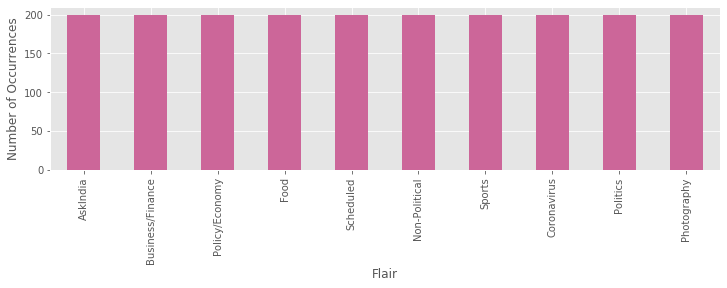

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(12,3))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flair', fontsize=12)
india_data.flair.value_counts().plot(kind='bar',  color=(0.8, 0.4, 0.6, 1))

<p><b> 2.4 </b> A plot for the number of comments for each flair. This could later determine the results of this number on the accuracy of the classifier. </p>

Text(0.5, 1.0, 'Number of Comments for each Flair')

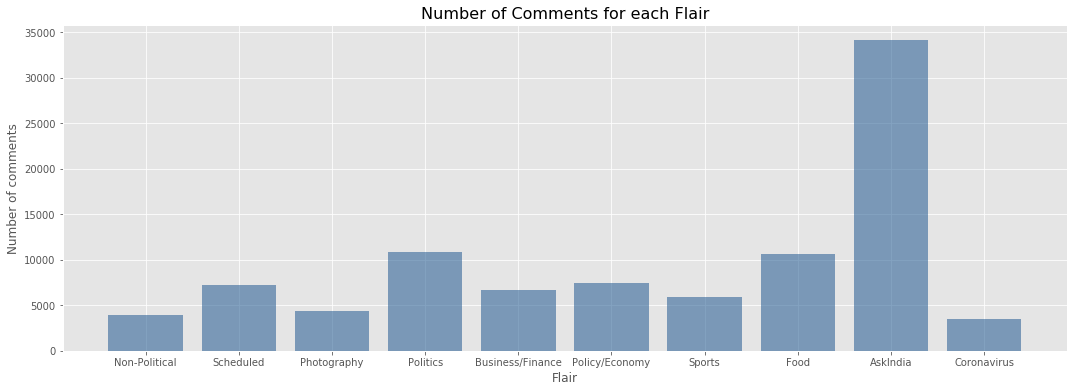

In [8]:
flair_comment_count = []
for flair in flairs:
    flair_comment_count.append(india_data.loc[india_data['flair'] == flair, 'num_comments'].sum(skipna = True))

plt.figure(figsize=(18,6))
plt.bar(flairs,flair_comment_count,color=(0.2, 0.4, 0.6, 0.6))

plt.xlabel('Flair', fontsize=12)
plt.ylabel('Number of comments', fontsize=12)
plt.title('Number of Comments for each Flair', fontsize = 16)

In [9]:
india_data.drop(['num_comments'], axis=1)

,flair,title,url,body,comments,score,id
0,Non-Political,Indian States / UTs if renamed for countries w...,https://i.redd.it/hk9o11b8dun41.png,NaN,nice name for Uttar Pradesh. Ajay Bisht is go...,185,flwd7r
1,Non-Political,Hotstar finally uploads Sunday’s “Last Week To...,https://www.hotstar.com/in/tv/last-week-tonigh...,NaN,First turning off the internet of an entire s...,162,fgb1k3
2,Non-Political,Best non-political stand up comedian?,https://www.reddit.com/r/india/comments/g3zbrt...,Any thing related to politics gives me anxiety...,Abhishek Upmanyu\n\n\nKenny Sebastian\n\n\nBi...,2,g3zbrt
3,Non-Political,ICSE and ISC exams have been postponed due to ...,https://cisce.org//UploadedFiles/PDF/COVID%201...,NaN,NaN,7,fl4viz
4,Non-Political,"[Non-Political]Friend wrote his first book, th...",https://www.reddit.com/r/india/comments/ezqw6i...,"A friend of mine wrote his first book ""Music M...",NaN,13,ezqw6i
...,...,...,...,...,...,...,...
1995,Coronavirus,Coronavirus update: Maharashtra lockdown till ...,https://www.hindustantimes.com/india-news/maha...,NaN,NaN,28,fz4ibx
1996,Coronavirus,India's lockdown had near 0 effect on the spre...,https://www.reddit.com/r/india/comments/fzs4jb...,See the total cases on log scale here:\nhttps:...,I don't think anyone would have supported a n...,0,fzs4jb
1997,Coronavirus,"17 Ludhiana cops, Judge quarantined as arreste...",https://www.news18.com/news/india/17-ludhiana-...,NaN,Nope still not community transmission,47,fz2it1
1998,Coronavirus,"Coronavirus Outbreak: A database of books, per...",https://www.firstpost.com/long-reads/coronavir...,NaN,NaN,3,fzo3k4


<h3> Most Common Words</h3>

<p><b>2.5</b> Function to plot the most common words in each of the relevant features. This will be helpful in finding the distribution relevant words, and accordingly we can decide the preprocessing and cleaning that the different features need. </p>

In [10]:
import nltk
def most_common_words_plt(x,c):
    words = x.str.lower().str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(words)
    words_dist = nltk.FreqDist(w for w in words)
    
    rslt = pd.DataFrame(words_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
    rslt.plot.bar(rot=0, figsize=(16,3), color=c)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

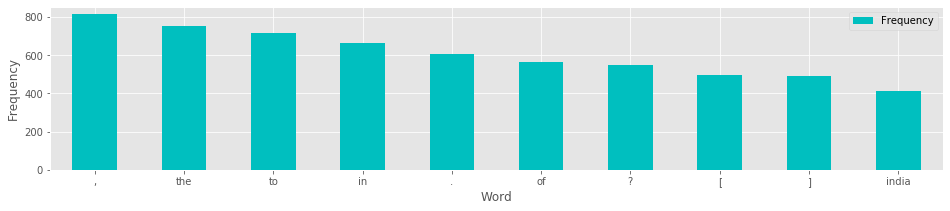

In [11]:
most_common_words_plt(india_data.title,'c')

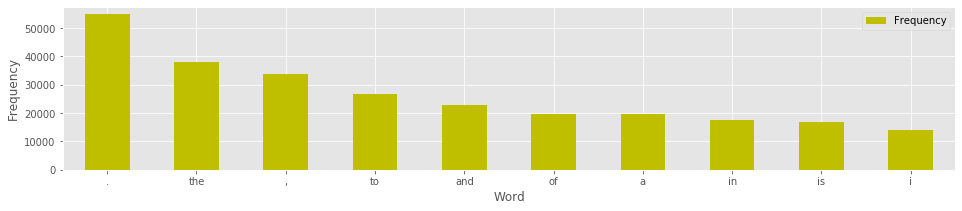

In [12]:
most_common_words_plt(india_data.comments,'y')

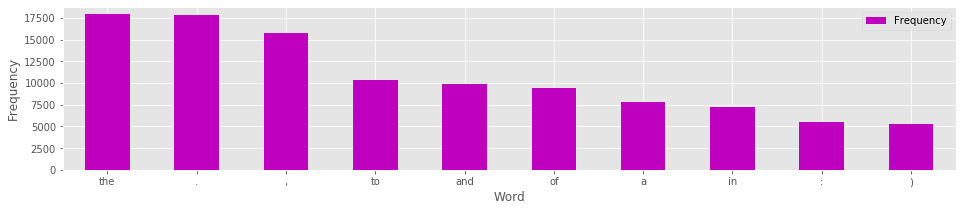

In [13]:
most_common_words_plt(india_data.body,'m')

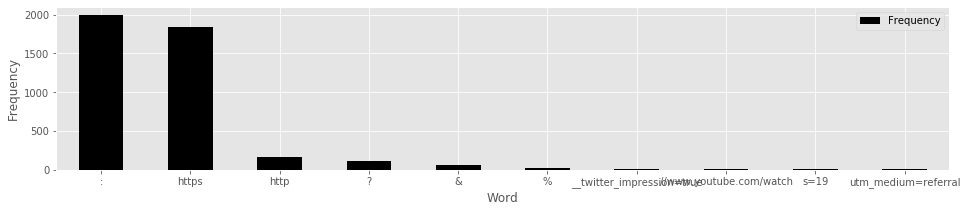

In [14]:
most_common_words_plt(india_data.url,'k')

<p><b>2.6 </b> Function to find the most used words of every relevant feature for each flair.  </p>

In [15]:
def flair_most_common_words(x):
    for flair in flairs: 
        print("\n\n{}:".format(flair))
        words = ' '.join(india_data.loc[india_data['flair'] == flair, x])
        words = nltk.tokenize.word_tokenize(words)
        words_dist = nltk.FreqDist(w for w in words)
        rslt = pd.DataFrame(words_dist.most_common(10),
                    columns=['Word', 'Frequency']).set_index('Word')
        display(rslt.head(4))

<h3> Preprocessing and Cleaning </h3>

<p><b>2.7</b> Preprocessing and cleaning step where we define a function to remove stopwords and remove symbols or replace by space. 

In [16]:
import re
import nltk
from nltk.corpus import stopwords

replace_by_space = re.compile('[/(){}\[\]\|@,;]')
bad_symbols = re.compile('[^0-9a-z #+_]')
stop_words = stopwords.words('english')

def clean_data(text):
    #converting to lowercase
    text = text.lower()
    #re.sub(new_value, text_to_processed) 
    text = replace_by_space.sub(' ', text)
    text = bad_symbols.sub('', text)
    #removing the stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words) 
    return text

<h3> Most Common Words After Preprocessing </h3>

In [17]:
india_data['title'] = india_data['title'].apply(clean_data)

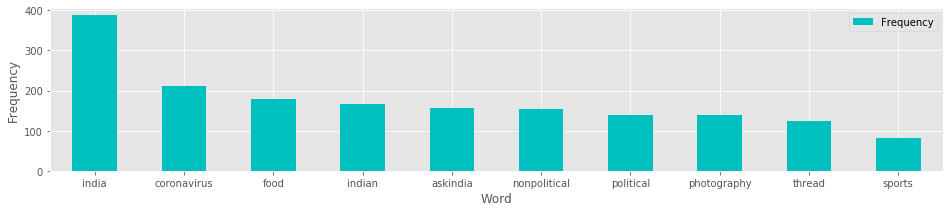

In [18]:
most_common_words_plt(india_data.title,'c')

In [19]:
flair_most_common_words('title')



Non-Political:


,Frequency
Word,
nonpolitical,148
political,59
non,53
india,36




Scheduled:


,Frequency
Word,
scheduled,75
thread,38
india,29
schedule,24




Photography:


,Frequency
Word,
photography,130
thread,69
india,38
weekly,35




Politics:


,Frequency
Word,
political,67
politics,62
india,30
delhi,21




Business/Finance:


,Frequency
Word,
week,54
indian,41
india,32
last,30




Policy/Economy:


,Frequency
Word,
india,59
economy,44
modi,22
indias,21




Sports:


,Frequency
Word,
sports,80
india,44
indian,23
sport,19




Food:


,Frequency
Word,
food,165
lockdown,38
india,20
delivery,17




AskIndia:


,Frequency
Word,
askindia,146
india,38
indian,16
help,14




Coronavirus:


,Frequency
Word,
coronavirus,178
india,61
lockdown,33
covid19,27


In [20]:
india_data['comments'] = india_data['comments'].astype('str').apply(clean_data)

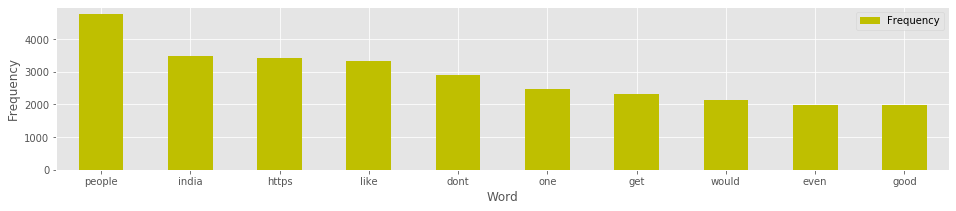

In [21]:
most_common_words_plt(india_data.comments,'y')

In [22]:
flair_most_common_words('comments')



Non-Political:


,Frequency
Word,
dont,138
like,132
india,125
people,125




Scheduled:


,Frequency
Word,
people,303
like,261
get,227
one,222




Photography:


,Frequency
Word,
https,210
get,169
good,169
like,152




Politics:


,Frequency
Word,
people,515
like,358
bjp,332
https,328




Business/Finance:


,Frequency
Word,
india,336
like,294
get,294
good,283




Policy/Economy:


,Frequency
Word,
india,596
people,474
like,415
economy,376




Sports:


,Frequency
Word,
like,327
india,314
people,307
dont,265




Food:


,Frequency
Word,
people,520
food,387
like,285
dont,280




AskIndia:


,Frequency
Word,
https,1966
people,1960
india,1235
cases,1217




Coronavirus:


,Frequency
Word,
https,153
cases,146
people,143
lockdown,116


In [23]:
india_data['body'] = india_data['body'].astype('str').apply(clean_data)

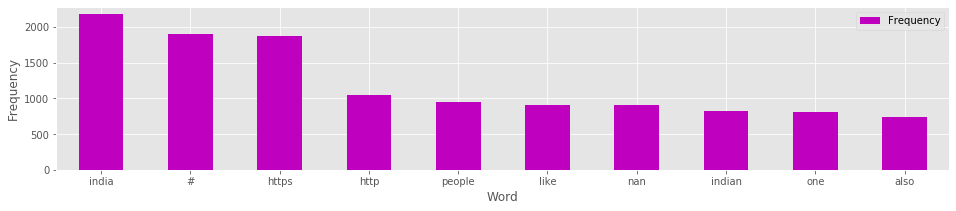

In [24]:
most_common_words_plt(india_data.body,'m')

In [25]:
flair_most_common_words('body')



Non-Political:


,Frequency
Word,
india,123
nan,100
indian,61
also,47




Scheduled:


,Frequency
Word,
#,202
https,168
india,129
like,89




Photography:


,Frequency
Word,
india,146
https,141
r,136
wwwredditcom,94




Politics:


,Frequency
Word,
nan,132
https,103
people,95
india,61




Business/Finance:


,Frequency
Word,
#,784
india,713
http,710
https,616




Policy/Economy:


,Frequency
Word,
india,608
https,431
#,300
people,244




Sports:


,Frequency
Word,
#,168
india,102
people,98
like,94




Food:


,Frequency
Word,
nan,138
food,71
people,54
https,39




AskIndia:


,Frequency
Word,
#,233
india,206
r,185
https,179




Coronavirus:


,Frequency
Word,
nan,174
https,112
#,77
india,56


<p>If we consider body as a feature, we will impute the null values that are present in the column as 'nan' </p>

<p> The url requires extra cleaning steps: </p> 

In [26]:
def clean_url(u):
    if u.startswith("http://"):
        u = u[7:]
    if u.startswith("https://"):
        u = u[8:]
    if u.startswith("www."):
        u = u[4:]
    if u.endswith("/"):
        u = u[:-1]
    return u

In [27]:
india_data['url'] = india_data['url'].apply(clean_url)
india_data['url'] = india_data['url'].apply(clean_data)

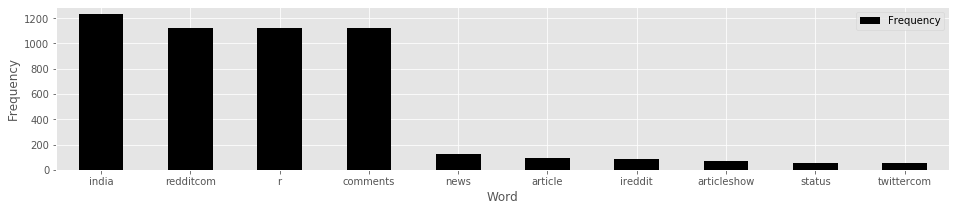

In [28]:
most_common_words_plt(india_data.url,'k')

<p><b>2.8</b> Finding the most and least common words to in the URLs grouped by the Flair after preprocessing. It was discovered that there were words at the end of the series that we complete sentences with words seperated by underscores. Besides this, it was also discovered that all flairs have the words "redditcom", "india", "r" and "comments" as the four most common words for each flair. </p>

In [29]:
flair_most_common_words('url')



Non-Political:


,Frequency
Word,
india,113
redditcom,111
r,111
comments,111




Scheduled:


,Frequency
Word,
india,145
redditcom,131
r,131
comments,131




Photography:


,Frequency
Word,
india,125
redditcom,123
r,123
comments,123




Politics:


,Frequency
Word,
india,89
redditcom,68
r,68
comments,68




Business/Finance:


,Frequency
Word,
india,157
redditcom,156
r,156
comments,156




Policy/Economy:


,Frequency
Word,
india,136
redditcom,130
r,130
comments,130




Sports:


,Frequency
Word,
india,120
redditcom,114
r,114
comments,114




Food:


,Frequency
Word,
india,83
redditcom,62
r,62
comments,62




AskIndia:


,Frequency
Word,
redditcom,198
r,198
india,198
comments,198




Coronavirus:


,Frequency
Word,
india,62
news,46
redditcom,26
r,26


In [30]:
def reddit_url(u):
    u = u.replace('redditcom', '')
    u = u.replace('r', '')
    u = u.replace('india', '')
    u = u.replace('comments','')
    for word in u:
        u = ' '.join(u.split('_'))
    return u

In [31]:
india_data['url'] = india_data['url'].apply(reddit_url)
india_data['url'] = india_data['url'].apply(clean_data)

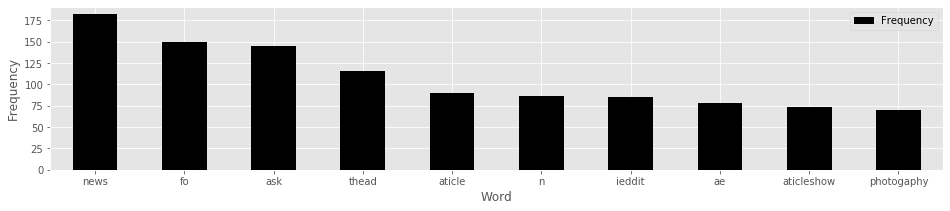

In [32]:
most_common_words_plt(india_data.url,'k')

In [33]:
flair_most_common_words('url')



Non-Political:


,Frequency
Word,
nonpolitical,51
non,27
political,24
iimgucom,18




Scheduled:


,Frequency
Word,
thead,37
scheduled,21
aticle,16
fo,15




Photography:


,Frequency
Word,
thead,68
photogaphy,62
weekly,35
2019,24




Politics:


,Frequency
Word,
news,24
status,21
twittecom,18
politics,18




Business/Finance:


,Frequency
Word,
week,54
n,38
fo,33
last,30




Policy/Economy:


,Frequency
Word,
fo,18
opinion,16
news,14
livemintcom,13




Sports:


,Frequency
Word,
spots,39
ieddit,14
aticle,12
ae,11




Food:


,Frequency
Word,
news,35
food,27
aticle,20
aticleshow,15




AskIndia:


,Frequency
Word,
ask,130
fo,24
ae,20
n,14




Coronavirus:


,Frequency
Word,
news,67
ndtvcom,19
aticleshow,16
2020,15


<h3> Length of each feature with respect to Flair </h3>

<p><b>2.9 </b> Plotting length of: a) title, b) comments, c) body, and d) url <br>  
against the unique flair values. This will be useful in comparing size of the x value with the y value which is the flair, and hence help us draw conclusions about the relation between the length of the x value and the flair prediction accuracy. </p> 

In [34]:
def feature_len(f,c):
    title_len = ""
    flair_title_len = []
    for flair in flairs:
        #print(flair)
        title_len = (india_data.loc[india_data['flair'] == flair, f].sum())
        flair_title_len.append(len(title_len))
    #print(flair_title_len)
    plt.figure(figsize=(18,4))
    plt.bar(flairs,flair_title_len,color=c)
    plt.xlabel('Flair', fontsize=12)
    plt.ylabel('{} Length'.format(f), fontsize=12)
    plt.title('Plotting total length of {} with flair'.format(f), fontsize = 16)

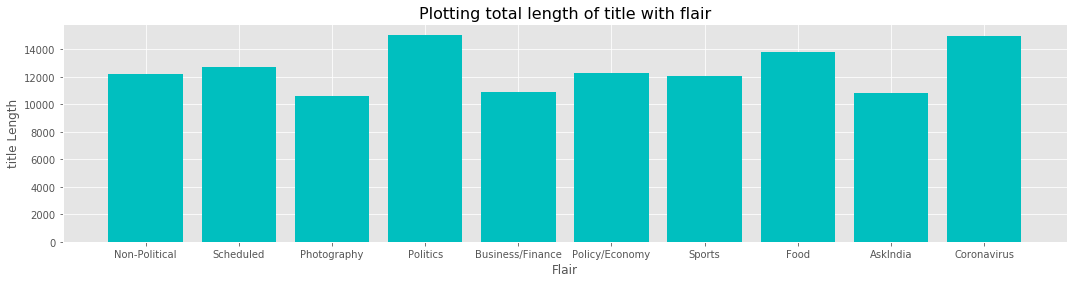

In [35]:
feature_len('title','c')

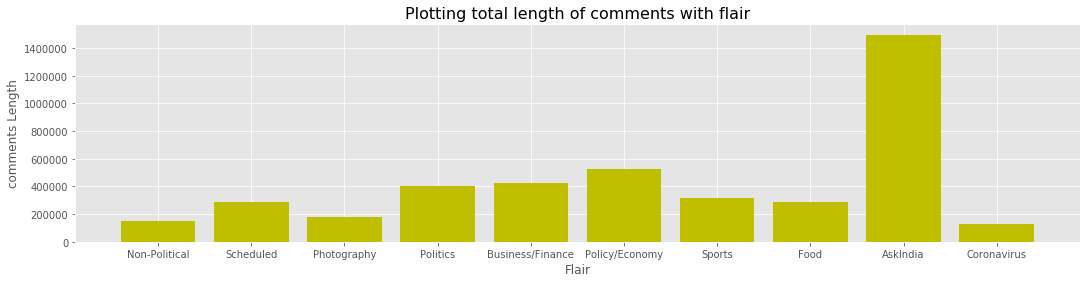

In [36]:
feature_len('comments','y')

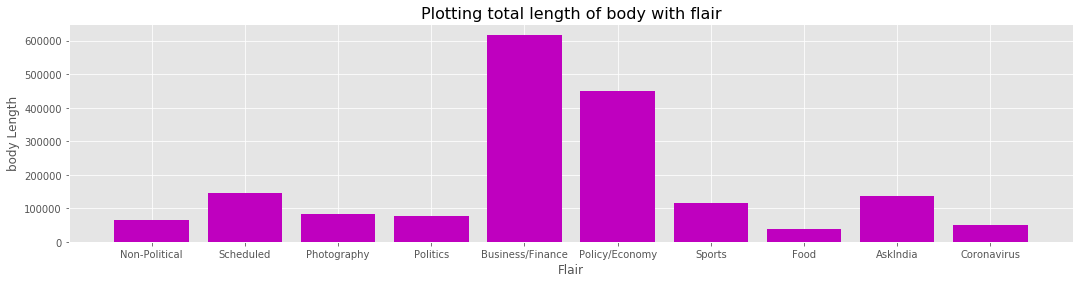

In [37]:
feature_len('body','m')

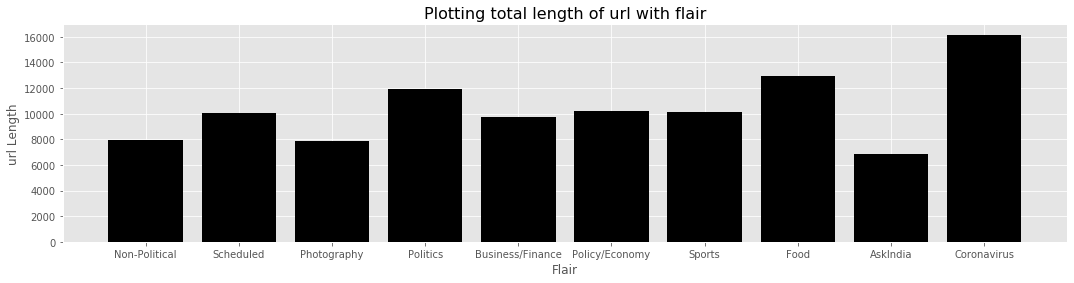

In [38]:
feature_len('url','k')